In [12]:
import numpy as np
from matplotlib import pyplot as plt
import psutil
psutil.virtual_memory()

svmem(total=16819896320, available=626851840, percent=96.3, used=15690055680, free=723849216, active=14141591552, inactive=1457328128, buffers=0, cached=405991424, shared=58540032, slab=119111680)

In [212]:
def scalar_field(R, theta, phi, nmodes_phi = 10, nmodes_theta = 10, R0 = 2):
    field = np.zeros(R.shape)
    field = 10*np.exp(-(R-R0))
    field+= np.sum(np.array([np.cos(10*theta*j/(2*np.pi)) for j in range(1,nmodes_theta)]), axis = 0)
    field+= np.sum(np.array([np.cos(20*phi*i/(2*np.pi)) for i in range(1,nmodes_phi)]), axis = 0)
    return field

def noisy_scalar_field(R, theta, phi, nmodes_phi = 10, nmodes_theta = 10, R0 = 2, sigma = 0.5):
    field = np.zeros(R.shape)
    field = 10*np.exp(-(R-R0)) + np.random.normal(0, sigma, size=R.shape)
    field+= np.sum(np.array([np.cos(10*theta*j/(2*np.pi)) for j in range(1,nmodes_theta)]), axis = 0)
    field+= np.sum(np.array([np.cos(20*phi*i/(2*np.pi)) for i in range(1,nmodes_phi)]), axis = 0)
    return field


class grid_torus:
    """
    Generates a grid object with both flattened and mesh versions of cartesian
    and toroidal grid.
    """
    def __init__(self, ngrid_cart, ngrid_tor, R0):
        self.R, self.theta, self.phi = np.meshgrid(np.linspace(1e-2, 1,ngrid_tor), 
                                                   np.linspace(0,2*np.pi, ngrid_tor), 
                                                   np.linspace(0,2*np.pi, 2*ngrid_tor),
                                                   indexing='ij')
        self.cart_x, self.cart_y, self.cart_z = np.meshgrid(np.linspace(-3,3, ngrid_cart),
                                                            np.linspace(-3,3, ngrid_cart),
                                                            np.linspace(-1,1, ngrid_cart),
                                                            indexing='ij')
        self.tor_x = (R0 + self.R*np.cos(self.theta))*np.cos(self.phi)
        self.tor_y = (R0 + self.R*np.cos(self.theta))*np.sin(self.phi)
        self.tor_z = self.R*np.sin(self.theta)
        
        self.cartflat = np.zeros((ngrid_cart**3, 3))
        self.cartflat[:,0] = self.cart_x.flatten()
        self.cartflat[:,1] = self.cart_y.flatten()
        self.cartflat[:,2] = self.cart_z.flatten()
        
        self.torflat = np.zeros((2*ngrid_tor**3, 3))
        self.torflat[:,0] = self.tor_x.flatten()
        self.torflat[:,1] = self.tor_y.flatten()
        self.torflat[:,2] = self.tor_z.flatten()
        
def toroidal_to_cart_coord(R0, R, theta, phi):
    x = (R0 + R*np.cos(theta))*np.cos(phi)
    y = (R0 + R*np.cos(theta))*np.sin(phi)
    z = R*np.sin(theta)
    return x, y, z

def cart_to_toroidal_coord(x, y, z, R0 = 2):
    R = np.sqrt( (np.sqrt(x**2 + y**2)- R0)**2 + z**2)
    theta = np.arctan2(z, np.sqrt(x**2 + y**2)-R0)
    phi = np.arctan2(y, x)
    return R, theta, phi

In [207]:
gridsynth = grid_torus(ngrid_cart = 100, ngrid_tor = 100, R0 = 2)
print(gridsynth.R.shape, gridsynth.theta.shape, gridsynth.phi.shape)

(100, 100, 200) (100, 100, 200) (100, 100, 200)


In [ ]:
"""
Generating the synthetic data wihtout noise
"""
synthfield_tor = scalar_field(R = gridsynth.R, theta = gridsynth.theta, phi = gridsynth.phi)
R1,theta1,phi1 = cart_to_toroidal_coord(x = gridsynth.cart_x, y = gridsynth.cart_y, z = gridsynth.cart_z)
synthfield_cart = scalar_field(R = R1, theta = theta1, phi = phi1)

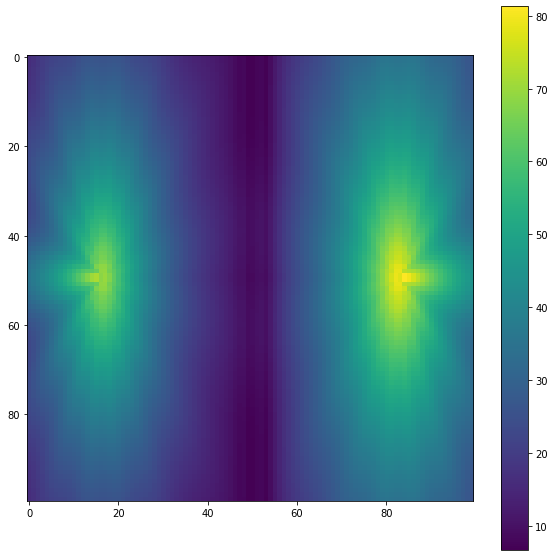

In [210]:
plt.figure(figsize=(10,10))
plt.imshow(synthfield_cart[:,50].T)
plt.colorbar()

In [213]:
"""
Generating the synthetic data wiht noise
"""
noisy_synthfield_tor = noisy_scalar_field(R = gridsynth.R, theta = gridsynth.theta, phi = gridsynth.phi)
noisy_synthfield_cart = noisy_scalar_field(R = R1, theta = theta1, phi = phi1)

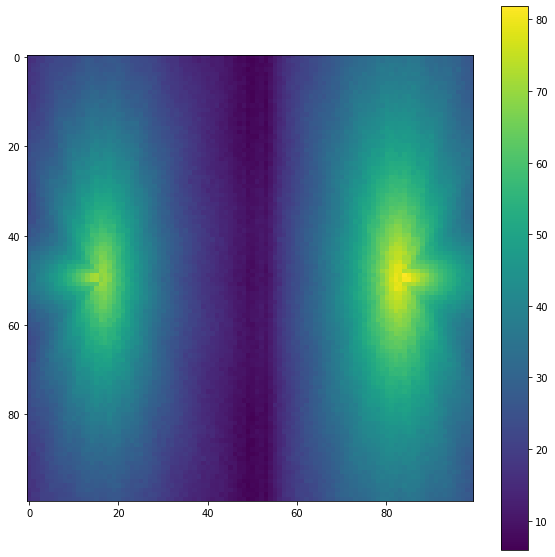

In [215]:
plt.figure(figsize=(10,10))
plt.imshow(noisy_synthfield_cart[:,50].T)
plt.colorbar()